# COVID-19 

# Table of Contents
1. Loading the data
2. Pre-processing
3. Vectorization
4. PCA  & Clustering
5. Dimensionality Reduction with t-SNE
6. Classification


<br>
<br>

In [8]:
import pandas as pd

root_path = r'C:\\Users\\ashut\\cord ner'
metadata_path = r'C:\Users\ashut\cord ner\metadata.csv\metadata.csv'

# Check if the file exists
import os
if not os.path.exists(metadata_path):
    raise FileNotFoundError(f"The file {metadata_path} does not exist.")

# Try reading the CSV file
try:
    meta_df = pd.read_csv(metadata_path, dtype={
        'pubmed_id': str,
        'Microsoft Academic Paper ID': str, 
        'doi': str
    })
    print(meta_df.head())
except Exception as e:
    print(f"Error reading the CSV file: {e}")

   cord_uid                                       sha source_x  \
0  vho70jcx  f056da9c64fbf00a4645ae326e8a4339d015d155  biorxiv   
1  i9tbix2v  daf32e013d325a6feb80e83d15aabc64a48fae33  biorxiv   
2  62gfisc6  f33c6d94b0efaa198f8f3f20e644625fa3fe10d2  biorxiv   
3  058r9486  4da8a87e614373d56070ed272487451266dce919  biorxiv   
4  wich35l7  eccef80cfbe078235df22398f195d5db462d8000  biorxiv   

                                               title             doi pmcid  \
0  SIANN: Strain Identification by Alignment to N...  10.1101/001727   NaN   
1  Spatial epidemiology of networked metapopulati...  10.1101/003889   NaN   
2  Sequencing of the human IG light chain loci fr...  10.1101/006866   NaN   
3  Bayesian mixture analysis for metagenomic comm...  10.1101/007476   NaN   
4  Mapping a viral phylogeny onto outbreak trees ...  10.1101/010389   NaN   

  pubmed_id  license                                           abstract  \
0       NaN  biorxiv  Next-generation sequencing is increas

In [11]:
root_path = r'C:\\Users\\ashut\\cord ner'
metadata_path = r'C:\Users\ashut\cord ner\metadata.csv\metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
4,wich35l7,eccef80cfbe078235df22398f195d5db462d8000,biorxiv,Mapping a viral phylogeny onto outbreak trees ...,10.1101/010389,NaN,NaN,biorxiv,Developing methods to reconstruct transmission...,2014-11-11,Stephen P Velsko; Jonathan E Allen,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/010389


In [9]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45774 entries, 0 to 45773
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   cord_uid                     45774 non-null  object
 1   sha                          31753 non-null  object
 2   source_x                     45774 non-null  object
 3   title                        45617 non-null  object
 4   doi                          42440 non-null  object
 5   pmcid                        26243 non-null  object
 6   pubmed_id                    34641 non-null  object
 7   license                      45774 non-null  object
 8   abstract                     37912 non-null  object
 9   publish_time                 45765 non-null  object
 10  authors                      43774 non-null  object
 11  journal                      41707 non-null  object
 12  Microsoft Academic Paper ID  964 non-null    object
 13  WHO #Covidence               17

### Fetch All of JSON File Path

Get path to all JSON files:

In [10]:
all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

33375

In [11]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
first_row = FileReader(all_json[0])
print(first_row)

0015023cc06b5362d332b3baf348d11567ca2fbb: word count: 194 22 Text word count: 5168 23 24 25 author/funder. All rights reserved. No reuse allowed without permission. Abstract 27 The positive stranded RNA genomes of picornaviruses comprise a si... VP3, and VP0 (which is further processed to VP2 and VP4 during virus assembly) (6). The P2 64 and P3 regions encode the non-structural proteins 2B and 2C and 3A, 3B (1-3) (VPg), 3C pro and 4 structura...


In [12]:
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data

### Load the Data into DataFrame

In [13]:
dict_ = {'paper_id': [], 'doi':[], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    
    try:
        content = FileReader(entry)
    except Exception as e:
        continue  # invalid paper format, skip
    
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    # no metadata, skip this paper
    if len(meta_data) == 0:
        continue
    
    dict_['abstract'].append(content.abstract)
    dict_['paper_id'].append(content.paper_id)
    dict_['body_text'].append(content.body_text)
    
    # also create a column for the summary of abstract to be used in a plot
    if len(content.abstract) == 0: 
        # no abstract provided
        dict_['abstract_summary'].append("Not provided.")
    elif len(content.abstract.split(' ')) > 100:
        # abstract provided is too long for plot, take first 100 words append with ...
        info = content.abstract.split(' ')[:100]
        summary = get_breaks(' '.join(info), 40)
        dict_['abstract_summary'].append(summary + "...")
    else:
        # abstract is short enough
        summary = get_breaks(content.abstract, 40)
        dict_['abstract_summary'].append(summary)
        
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    
    try:
        # if more than one author
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # if more than 2 authors, take them all with html tag breaks in between
            dict_['authors'].append(get_breaks('. '.join(authors), 40))
        else:
            # authors will fit in plot
            dict_['authors'].append(". ".join(authors))
    except Exception as e:
        # if only one author - or Null valie
        dict_['authors'].append(meta_data['authors'].values[0])
    
    # add the title information, add breaks when needed
    try:
        title = get_breaks(meta_data['title'].values[0], 40)
        dict_['title'].append(title)
    # if title was not provided
    except Exception as e:
        dict_['title'].append(meta_data['title'].values[0])
    
    # add the journal information
    dict_['journal'].append(meta_data['journal'].values[0])
    
    # add doi
    dict_['doi'].append(meta_data['doi'].values[0])
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'doi', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

Processing index: 0 of 33375
Processing index: 3337 of 33375
Processing index: 6674 of 33375
Processing index: 10011 of 33375
Processing index: 13348 of 33375
Processing index: 16685 of 33375
Processing index: 20022 of 33375
Processing index: 23359 of 33375
Processing index: 26696 of 33375
Processing index: 30033 of 33375
Processing index: 33370 of 33375


,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
0,0015023cc06b5362d332b3baf348d11567ca2fbb,10.1101/2020.01.10.901801,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP...",Joseph C. Ward. Lidia Lasecka-Dykes. Chris<...,The RNA pseudoknots in foot-and-mouth disease...,NaN,word count: 194 22 Text word count: 5168 23 2...
1,00340eea543336d54adda18236424de6a5e91c9d,10.1101/2020.03.16.20034470,"During the past three months, a new coronaviru...","In December 2019, a novel coronavirus, SARS-Co...",Carla Mavian. Simone Marini. Costanza Manes...,Regaining perspective on SARS-CoV-2<br>molecu...,NaN,"During the past three months, a new coronavir..."
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,10.1101/2020.02.11.20022111,,The 2019-nCoV epidemic has spread across China...,Hanchu Zhou. Jianan Yang. Kaichen Tang. <br...,Healthcare-resource-adjusted<br>vulnerabiliti...,NaN,Not provided.
3,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,10.1101/634600,Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by...",Salman L. Butt. Eric C. Erwood. Jian Zhang....,"Real-time, MinION-based, amplicon<br>sequenci...",NaN,Infectious bronchitis (IB) causes<br>signific...
4,0139ea4ca580af99b602c6435368e7fdbefacb03,10.1101/2020.03.12.977918,Nipah Virus (NiV) came into limelight recently...,Nipah is an infectious negative-sense single-s...,Nishi Kumari. Ayush Upadhyay. Kishan Kalia....,A Combined Evidence Approach to Prioritize<br...,NaN,Nipah Virus (NiV) came into limelight recentl...


<br>

## Some feature engineering

Adding word count columns for both abstract and body_text can be useful parameters later:

In [14]:
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))  # word count in abstract
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))  # word count in body
df_covid['body_unique_words']=df_covid['body_text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
df_covid.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count,body_unique_words
0,0015023cc06b5362d332b3baf348d11567ca2fbb,10.1101/2020.01.10.901801,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP...",Joseph C. Ward. Lidia Lasecka-Dykes. Chris<...,The RNA pseudoknots in foot-and-mouth disease...,NaN,word count: 194 22 Text word count: 5168 23 2...,241,1728,705
1,00340eea543336d54adda18236424de6a5e91c9d,10.1101/2020.03.16.20034470,"During the past three months, a new coronaviru...","In December 2019, a novel coronavirus, SARS-Co...",Carla Mavian. Simone Marini. Costanza Manes...,Regaining perspective on SARS-CoV-2<br>molecu...,NaN,"During the past three months, a new coronavir...",175,2549,1072
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,10.1101/2020.02.11.20022111,,The 2019-nCoV epidemic has spread across China...,Hanchu Zhou. Jianan Yang. Kaichen Tang. <br...,Healthcare-resource-adjusted<br>vulnerabiliti...,NaN,Not provided.,0,755,377
3,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,10.1101/634600,Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by...",Salman L. Butt. Eric C. Erwood. Jian Zhang....,"Real-time, MinION-based, amplicon<br>sequenci...",NaN,Infectious bronchitis (IB) causes<br>signific...,1647,4003,1185
4,0139ea4ca580af99b602c6435368e7fdbefacb03,10.1101/2020.03.12.977918,Nipah Virus (NiV) came into limelight recently...,Nipah is an infectious negative-sense single-s...,Nishi Kumari. Ayush Upadhyay. Kishan Kalia....,A Combined Evidence Approach to Prioritize<br...,NaN,Nipah Virus (NiV) came into limelight recentl...,326,2399,1026


In [15]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30197 entries, 0 to 30196
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             30197 non-null  object
 1   doi                  29891 non-null  object
 2   abstract             30197 non-null  object
 3   body_text            30197 non-null  object
 4   authors              29646 non-null  object
 5   title                30162 non-null  object
 6   journal              29077 non-null  object
 7   abstract_summary     30197 non-null  object
 8   abstract_word_count  30197 non-null  int64 
 9   body_word_count      30197 non-null  int64 
 10  body_unique_words    30197 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.5+ MB


In [16]:
df_covid['abstract'].describe(include='all')

count     30197
unique    22480
top            
freq       7684
Name: abstract, dtype: object

## Handle Possible Duplicates

In [17]:
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True)
df_covid['abstract'].describe(include='all')

count     30184
unique    22480
top            
freq       7677
Name: abstract, dtype: object

In [18]:
df_covid['body_text'].describe(include='all')

count                                                 30184
unique                                                30183
top       In a global world, knowledge of imported infec...
freq                                                      2
Name: body_text, dtype: object

In [19]:
df_covid.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count,body_unique_words
0,0015023cc06b5362d332b3baf348d11567ca2fbb,10.1101/2020.01.10.901801,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP...",Joseph C. Ward. Lidia Lasecka-Dykes. Chris<...,The RNA pseudoknots in foot-and-mouth disease...,NaN,word count: 194 22 Text word count: 5168 23 2...,241,1728,705
1,00340eea543336d54adda18236424de6a5e91c9d,10.1101/2020.03.16.20034470,"During the past three months, a new coronaviru...","In December 2019, a novel coronavirus, SARS-Co...",Carla Mavian. Simone Marini. Costanza Manes...,Regaining perspective on SARS-CoV-2<br>molecu...,NaN,"During the past three months, a new coronavir...",175,2549,1072
2,004f0f8bb66cf446678dc13cf2701feec4f36d76,10.1101/2020.02.11.20022111,,The 2019-nCoV epidemic has spread across China...,Hanchu Zhou. Jianan Yang. Kaichen Tang. <br...,Healthcare-resource-adjusted<br>vulnerabiliti...,NaN,Not provided.,0,755,377
3,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,10.1101/634600,Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by...",Salman L. Butt. Eric C. Erwood. Jian Zhang....,"Real-time, MinION-based, amplicon<br>sequenci...",NaN,Infectious bronchitis (IB) causes<br>signific...,1647,4003,1185
4,0139ea4ca580af99b602c6435368e7fdbefacb03,10.1101/2020.03.12.977918,Nipah Virus (NiV) came into limelight recently...,Nipah is an infectious negative-sense single-s...,Nishi Kumari. Ayush Upadhyay. Kishan Kalia....,A Combined Evidence Approach to Prioritize<br...,NaN,Nipah Virus (NiV) came into limelight recentl...,326,2399,1026


In [20]:
df_covid.describe()

,abstract_word_count,body_word_count,body_unique_words
count,30184.000000,30184.000000,30184.000000
mean,167.169328,4820.864034,1447.541512
std,174.530817,7202.601394,1197.145123
min,0.000000,1.000000,1.000000
25%,0.000000,2489.000000,931.000000
50%,165.000000,3740.000000,1259.000000
75%,240.000000,5503.000000,1685.000000
max,5118.000000,260378.000000,38298.000000


# Data Pre-processing

In [21]:
#rename to df for ease of use
df = df_covid
del df_covid

In [22]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28314 entries, 1053 to 30196
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             28314 non-null  object
 1   doi                  28314 non-null  object
 2   abstract             28314 non-null  object
 3   body_text            28314 non-null  object
 4   authors              28314 non-null  object
 5   title                28314 non-null  object
 6   journal              28314 non-null  object
 7   abstract_summary     28314 non-null  object
 8   abstract_word_count  28314 non-null  int64 
 9   body_word_count      28314 non-null  int64 
 10  body_unique_words    28314 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.6+ MB


### Handling multiple languages
Next we are going to determine the language of each paper in the dataframe. Not all of the sources are English and the language needs to be identified so that we know how handle these instances

In [27]:
!pip install tqdm

In [29]:
!pip install langdetect


     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ------------------------------ ------- 786.4/981.5 kB 8.2 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993251 sha256=3bd01e5807a80e9ca2655eeec2b0ccde655577de8cb4935f02ff34c33d147742
  Stored in directory: c:\users\ashut\appdata\local\pip\cache\wheels\eb\87\25\2dddf1c94e1786054e25022ec5530bfed52bad86d882999c48
Successfully built langdetect


In [23]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['body_text'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

100%|██████████| 28314/28314 [00:59<00:00, 474.74it/s]


In [24]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 28314

{'af': 1,
 'ca': 1,
 'cy': 1,
 'de': 48,
 'en': 27679,
 'es': 257,
 'fr': 297,
 'it': 13,
 'pl': 2,
 'pt': 14,
 'zh-cn': 1}


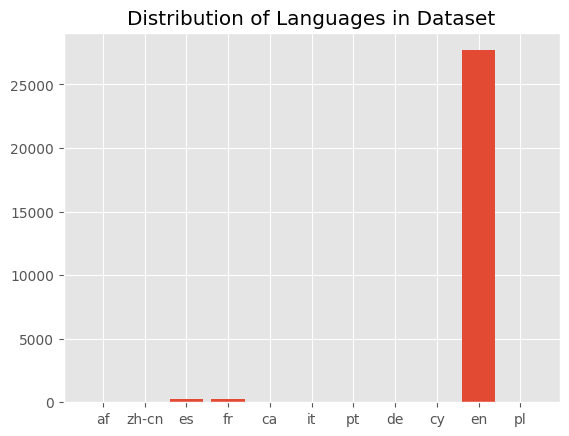

In [25]:
df['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()


Drop any language that is not English. 

In [35]:
df = df[df['language'] == 'en'] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27679 entries, 1053 to 30196
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             27679 non-null  object
 1   doi                  27679 non-null  object
 2   abstract             27679 non-null  object
 3   body_text            27679 non-null  object
 4   authors              27679 non-null  object
 5   title                27679 non-null  object
 6   journal              27679 non-null  object
 7   abstract_summary     27679 non-null  object
 8   abstract_word_count  27679 non-null  int64 
 9   body_word_count      27679 non-null  int64 
 10  body_unique_words    27679 non-null  int64 
 11  language             27679 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.7+ MB


In [44]:
pip show tqdm

Name: tqdm
Version: 4.67.0
Summary: Fast, Extensible Progress Meter
Home-page: https://tqdm.github.io
Author: 
Author-email: 
License: MPL-2.0 AND MIT
Location: c:\Users\ashut\AppData\Local\Programs\Python\Python313\Lib\site-packages
Requires: colorama
Required-by: nltk
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import seaborn as sns

C:\Users\ashut\AppData\Local\Temp\ipykernel_118964\820199542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['body_word_count'])


count     27679.000000
mean       4672.184508
std        5165.128423
min          12.000000
25%        2595.000000
50%        3809.000000
75%        5528.000000
max      232431.000000
Name: body_word_count, dtype: float64

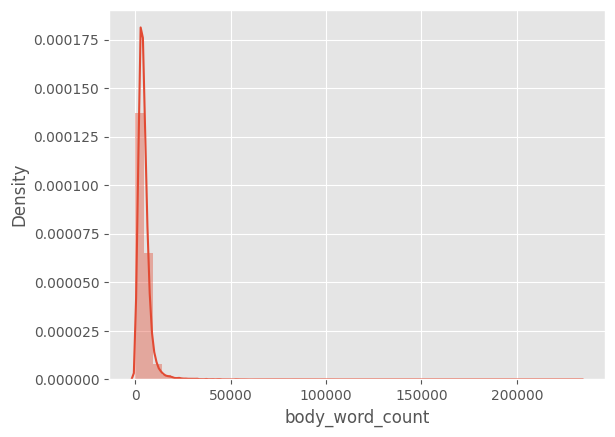

In [ ]:
sns.distplot(df['body_word_count'])
df['body_word_count'].describe()

C:\Users\ashut\AppData\Local\Temp\ipykernel_118964\2813988722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['body_unique_words'])


count    27679.000000
mean      1431.322194
std        929.678683
min         12.000000
25%        960.000000
50%       1277.000000
75%       1689.000000
max      30523.000000
Name: body_unique_words, dtype: float64

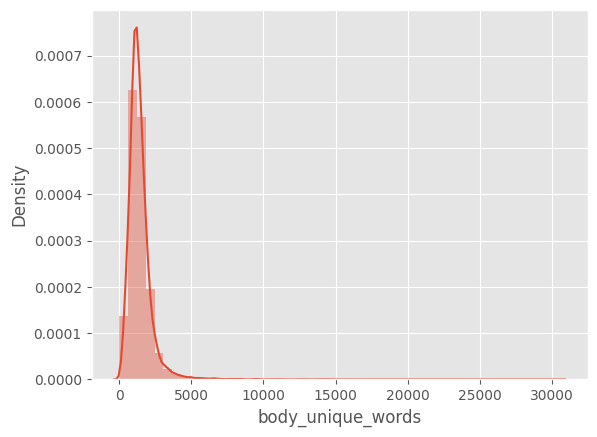

In [ ]:
sns.distplot(df['body_unique_words'])
df['body_unique_words'].describe()

These two plots give us a good idea of the content we are dealing with. Most papers are about 5000 words in length. The long tails in both plots are caused by outliers. In fact, ~98% of the papers are under 20,000 words in length while a select few are over 200,000! <br><br>

# Vectorization


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

Vectorize our data. We will be clustering based off the content of the body text. The maximum number of features will be limited. Only the top 2 ** 12 features will be used, eseentially acting as a noise filter. Additionally, more features cause painfully long runtimes.

In [54]:
df.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count,body_unique_words,language
1053,00142f93c18b07350be89e96372d240372437ed9,10.3389/fimmu.2015.00527,Dendritic cells (DCs) are specialized antigen-...,iNTRODUCTiON Human beings are constantly expos...,"Geginat, Jens. Nizzoli, Giulia. Paroni,<br>...",Immunity to Pathogens Taught by Specialized<b...,Front Immunol,Dendritic cells (DCs) are specialized<br>anti...,309,5305,1522,en
1054,0022796bb2112abd2e6423ba2d57751db06049fb,10.1371/journal.pntd.0004943,Dengue has a negative impact in low-and lower ...,Pathogens and vectors can now be transported r...,"Viennet, Elvina. Ritchie, Scott A.. William...",Public Health Responses to and Challenges for...,PLoS Negl Trop Dis,Dengue has a negative impact in low-and lower...,276,7288,2560,en
1055,0031e47b76374e05a18c266bd1a1140e5eacb54f,10.1371/journal.pone.0230148,"Fecal microbial transplantation (FMT), a treat...",a1111111111 a1111111111 a1111111111 a111111111...,"McKinney, Caroline A.. Oliveira, Bruno C. M....",The fecal microbiota of healthy donor horses<...,PLoS One,"Fecal microbial transplantation (FMT), a<br>t...",141,4669,1660,en
1056,00326efcca0852dc6e39dc6b7786267e1bc4f194,10.3389/fped.2016.00005,"Fifteen years ago, United Nations world leader...",In addition to preventative care and nutrition...,"Turner, Erin L.. Nielsen, Katie R.. Jamal,<...",A Review of Pediatric Critical Care in<br>Res...,Front Pediatr,"Fifteen years ago, United Nations world<br>le...",151,7593,2440,en
1057,00352a58c8766861effed18a4b079d1683fec2ec,10.3389/fnsyn.2017.00016,Posttranslational modification of proteins by ...,Ubiquitination is a widely used posttranslatio...,"Hodul, Molly. Dahlberg, Caroline L.. Juo,<b...",Function of the Deubiquitinating Enzyme USP46...,Front Synaptic Neurosci,Posttranslational modification of proteins<br...,148,3156,1068,en


In [55]:
text = df['body_text'].values
X = vectorize(text, 2 ** 12)
X.shape

(27679, 4096)

# PCA  & Clustering

Let's see how much we can reduce the dimensions while still keeping 95% variance. We will apply Principle Component Analysis (PCA) to our vectorized data.


In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(27679, 2303)

To separate the literature, k-means will be run on the vectorized text. Given the number of clusters, k, k-means will categorize each vector by taking the mean distance to a randomly initialized centroid. The centroids are updated iteratively.

In [57]:
from sklearn.cluster import KMeans

[source](https://en.wikipedia.org/wiki/K-means_clustering)

### number of K? 

To find the best k value for k-means we'll look at the distortion at different k values. Distortion computes the sum of squared distances from each point to its assigned center. When distortion is plotted against k there will be a k value after which decreases in distortion are minimal. This is the desired number of clusters.

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

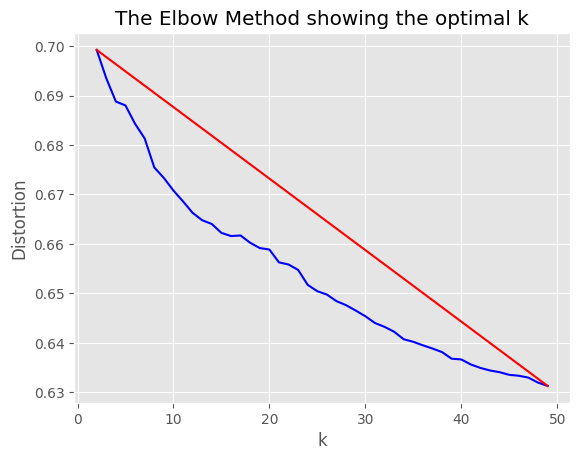

In [61]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In this plot we can see that the better k values are between 18-25. After that, the decrease in distortion is not as significant. For simplicity, we will use k=20

### Run k-means

Now that we have an appropriate k value, we can run k-means on the PCA-processed feature vector (X_reduced). 

In [63]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

# Dimensionality Reduction with t-SNE

Using [t-SNE](https://lvdmaaten.github.io/tsne) we can reduce our high dimensional features vector to 2 dimensions. By using the 2 dimensions as x,y coordinates, the body_text can be plotted. 

t-Distributed Stochastic Neighbor Embedding (t-SNE) reduces dimensionality while trying to keep similar instances close and dissimilar instances apart. It is mostly used for visualization, in particular to visualize clusters of instances in high-dimensional space


In [65]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 27679 samples in 0.133s...
[t-SNE] Computed neighbors for 27679 samples in 28.542s...
[t-SNE] Computed conditional probabilities for sample 1000 / 27679
[t-SNE] Computed conditional probabilities for sample 2000 / 27679
[t-SNE] Computed conditional probabilities for sample 3000 / 27679
[t-SNE] Computed conditional probabilities for sample 4000 / 27679
[t-SNE] Computed conditional probabilities for sample 5000 / 27679
[t-SNE] Computed conditional probabilities for sample 6000 / 27679
[t-SNE] Computed conditional probabilities for sample 7000 / 27679
[t-SNE] Computed conditional probabilities for sample 8000 / 27679
[t-SNE] Computed conditional probabilities for sample 9000 / 27679
[t-SNE] Computed conditional probabilities for sample 10000 / 27679
[t-SNE] Computed conditional probabilities for sample 11000 / 27679
[t-SNE] Computed conditional probabilities for sample 12000 / 27679
[t-SNE] Computed conditional probabilities for s

So that step took a while! Let's take a look at what our data looks like when compressed to 2 dimensions. 

C:\Users\ashut\AppData\Local\Temp\ipykernel_118964\2899960178.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=palette)


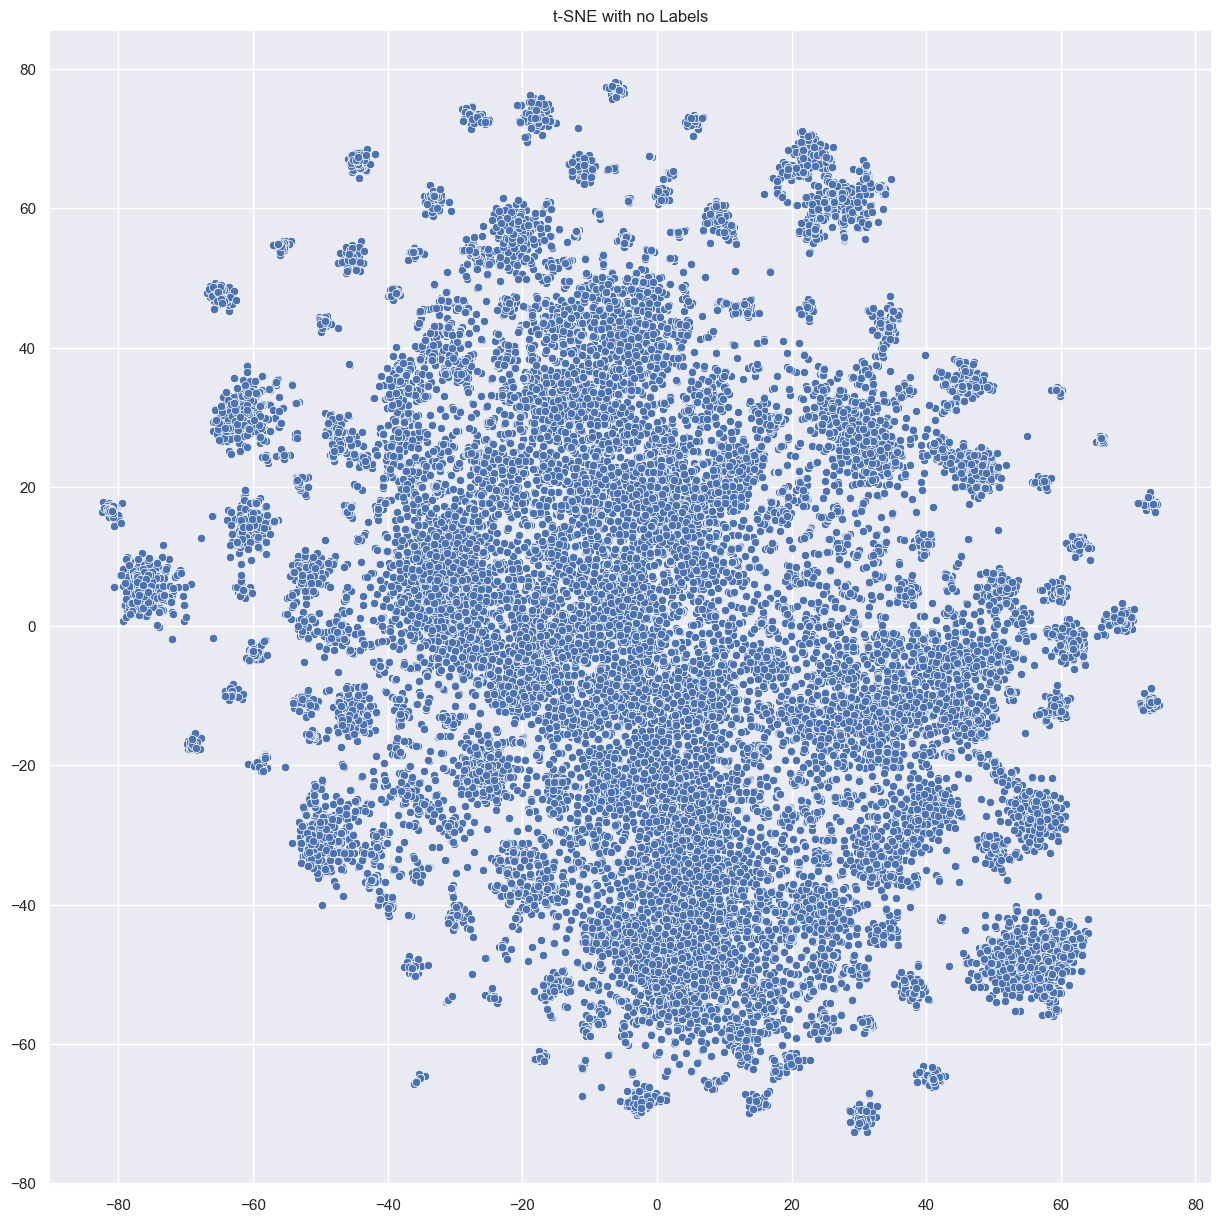

In [71]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
#plt.savefig("plots/t-sne_covid19.png")
plt.show()

This looks ordinary. There are some clusters we can immediately detect, but the many instances closer to the center are harder to separate. t-SNE did a good job at reducing the dimensionality, but now we need some labels. Let's use the clusters found by k-means as labels. This will help visually separate different concentrations of topics.

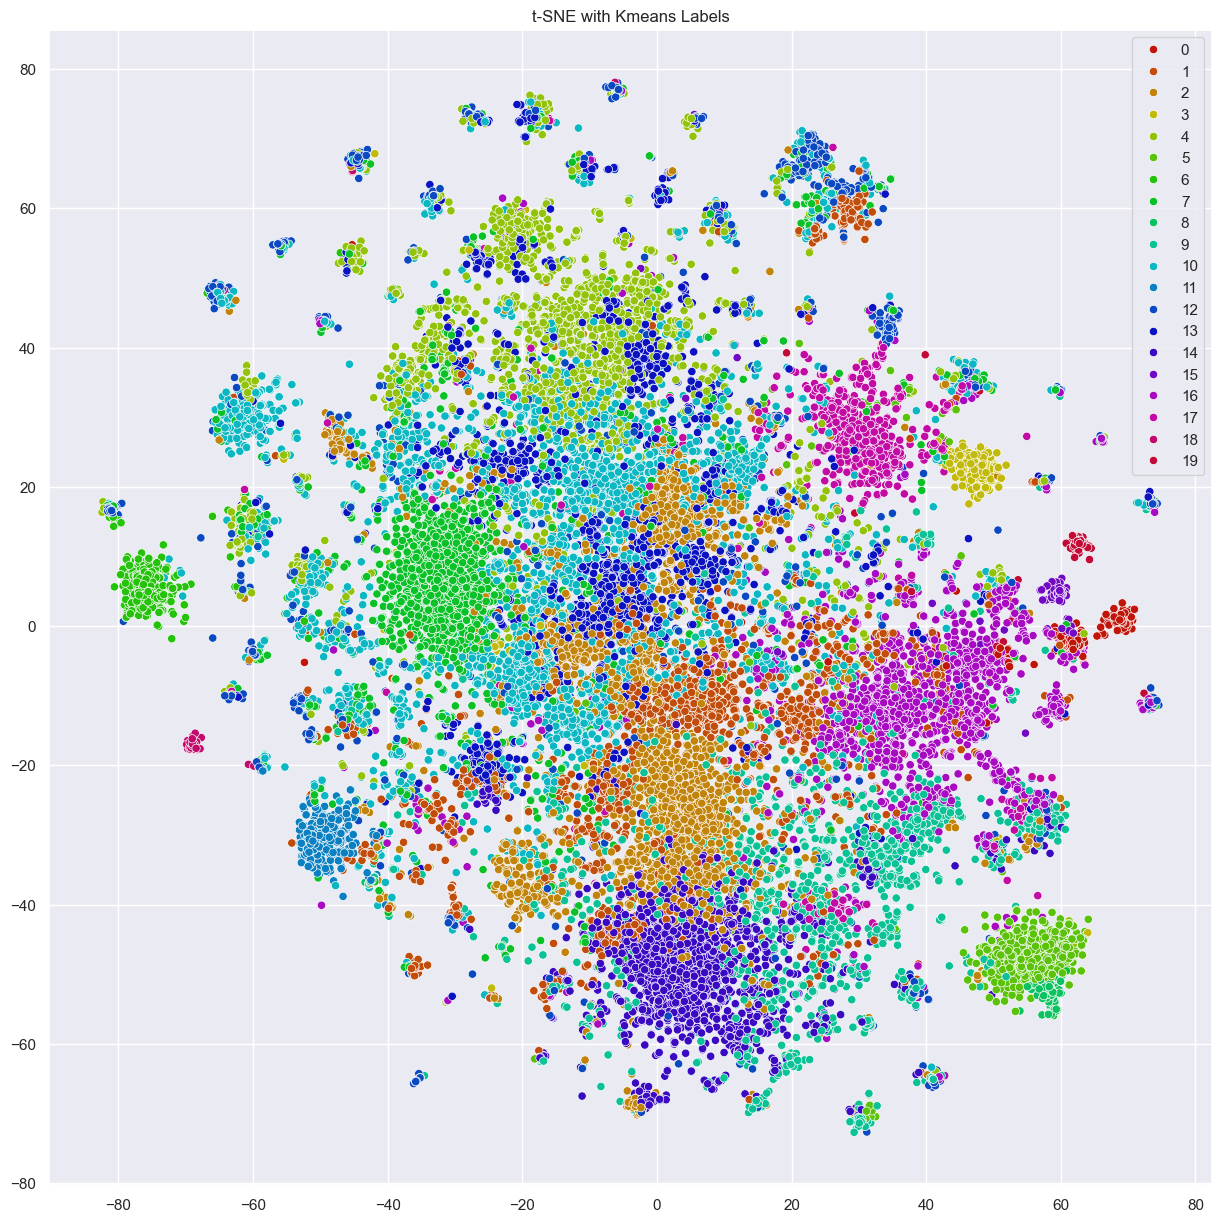

In [72]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
#plt.savefig("plots/improved_cluster_tsne.png")
plt.show()

The labeled plot provides insight into how the papers are grouped. Interestingly, both k-means and t-SNE identify similar clusters despite running independently. Here, t-SNE sets the position of each paper, while k-means assigns the color labels. In regions where t-SNE groups many papers, k-means often labels them uniformly, reflecting underlying structure in the literature.

In some cases, k-means labels are spread across the plot, showing how each method captures different relationships in the data. This effect, often seen in subclusters, highlights overlapping topics that are challenging to separate.

This clustering approach goes beyond a simple search tool. By focusing on mathematical similarities, the algorithms can uncover subtle connections that might not be obvious, potentially revealing new insights and aiding further research.

# Classiffication

Though arbitrary, after running kmeans, the data is now 'labeled'. This means that we now use supervised learning to see how well the clustering generalizes. This is just one way to evaluate the clustering. If k-means was able to find a meaningful split in the data, it should be possible to train a classifier to predict which cluster a given instance should belong to. 

In [94]:
# function to print out classification model report
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='macro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='macro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='macro')) * 100), "%")

Let's split the data into train/test sets

In [95]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X.toarray(),y_pred, test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 22143
X_test size: 5536 



Now let's create a Stochastic Gradient Descent classifier 

**Precision** is ratio of True Positives to True Positives + False Positives. This is the accuracy of positive predictions<br>
**Recall** (also known as TPR) measures the ratio of True Positives to True Positives + False Negatives. It measures the ratio of positive instances that are correctly detected by the classifer.<br>
**F1 score**  is the harmonic average of the precision and recall. F1 score will only be high if both precision and recall are high


In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# SGD instance
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42, n_jobs=-1)
# train SGD
sgd_clf.fit(X_train, y_train)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=-1)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_train, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  88.227 %
     Precision:  90.698 %
        Recall:  86.697 %
      F1 score:  88.259 %


To test for overfitting, let's see how the model generalizes over the test set

In [97]:
# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3, n_jobs=-1)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_test, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  86.796 %
     Precision:  89.282 %
        Recall:  86.050 %
      F1 score:  87.280 %


Now let's see how the model can generalize across the whole dataset. 

In [98]:
sgd_cv_score = cross_val_score(sgd_clf, X.toarray(), y_pred, cv=10)
print("Mean cv Score - SGD: {:,.3f}".format(float(sgd_cv_score.mean()) * 100), "%")

Mean cv Score - SGD: 89.324 %
